# My Scratchpad for Zillow Clustering Project

In [40]:
#imports
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
from env import host, user, password

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Acquire Zillow Data

In [2]:
df = acquire.get_zillow_data(cached=True)
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.007357,2017-07-07,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
1,1072280,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.021066,2017-08-29,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
2,1340933,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.077174,2017-04-04,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
3,1878109,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.041238,2017-03-17,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,2190858,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,-0.009496,2017-03-24,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [3]:
df.shape

(77575, 68)

# Prepare Zillow Data

In [4]:
df = prepare.wrangle_zillow()

In [5]:
df.shape

(69920, 25)

In [6]:
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
county                          0
logerror_class                  0
dtype: int64

In [7]:
df.head(1)

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,logerror_class
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3.0,8.0,2107.0,6037.0,34.222559,-118.617387,9158.0,6.037113e+07,12447.0,...,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central,Los_Angeles,q2


In [8]:
def get_counties():
    '''
    This function will create dummy variables out of the original fips column. 
    And return a dataframe with all of the original columns except regionidcounty.
    We will keep fips column for data validation after making changes. 
    New columns added will be 'LA', 'Orange', and 'Ventura' which are boolean 
    The fips ids are renamed to be the name of the county each represents. 
    '''
    # create dummy vars of fips id
    county_df = pd.get_dummies(df.fips)
    # rename columns by actual county name
    county_df.columns = ['LA', 'Orange', 'Ventura']
    # concatenate the dataframe with the 3 county columns to the original dataframe
    df_dummies = pd.concat([df, county_df], axis = 1)
    # drop regionidcounty and fips columns
    df_dummies = df_dummies.drop(columns = ['regionidcounty'])
    return df_dummies

In [9]:
df = get_counties()
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,logerror_class,LA,Orange,Ventura
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3.0,8.0,2107.0,6037.0,34.222559,-118.617387,9158.0,6.037113e+07,12447.0,...,374484.0,7659.36,-0.007357,2017-07-07,Central,Los_Angeles,q2,1,0,0
10711877,2.0,4.0,8.0,1882.0,6037.0,34.220261,-118.616409,9035.0,6.037113e+07,12447.0,...,407000.0,8123.91,0.021066,2017-08-29,Central,Los_Angeles,q3,1,0,0
10711888,2.0,4.0,8.0,1882.0,6037.0,34.222491,-118.616854,9800.0,6.037113e+07,12447.0,...,285332.0,6673.24,0.077174,2017-04-04,Central,Los_Angeles,q4,1,0,0
10711910,2.0,3.0,8.0,1477.0,6037.0,34.221864,-118.615739,11285.0,6.037113e+07,12447.0,...,20063.0,1116.46,-0.041238,2017-03-17,Central,Los_Angeles,q1,1,0,0
10711923,2.0,4.0,8.0,1918.0,6037.0,34.220619,-118.615253,11239.0,6.037113e+07,12447.0,...,247590.0,5239.85,-0.009496,2017-03-24,Central,Los_Angeles,q2,1,0,0


In [10]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'county', 'logerror_class', 'LA', 'Orange',
       'Ventura'],
      dtype='object')

In [11]:
df.sample(10).T

parcelid,11657638,14709964,13955009,14213744,14089669,11315031,12739130,12872939,12093200,11143531
bathroomcnt,2,2,2,3,2,2,2,3,2,3
bedroomcnt,2,3,3,4,4,3,3,4,3,4
buildingqualitytypeid,11,6,6,6,6,8,8,8,6,8
calculatedfinishedsquarefeet,1512,1284,1204,2503,1931,1385,1819,1708,1704,1882
fips,6037,6059,6059,6059,6059,6037,6037,6037,6037,6037
latitude,34.0548,33.6789,33.7481,33.8341,33.761,34.7088,33.9123,34.0716,34.1757,34.4172
longitude,-118.466,-117.811,-117.946,-117.828,-118.036,-118.097,-118.012,-117.732,-118.162,-118.487
lotsizesquarefeet,18489,7313,6060,13260,6500,6985,10412,9647,6415,462910
rawcensustractandblock,6.03726e+07,6.05905e+07,6.05909e+07,6.05908e+07,6.0591e+07,6.0379e+07,6.0375e+07,6.0374e+07,6.03746e+07,6.03792e+07
regionidcity,12447,52650,24832,33252,34780,5534,5465,20008,47019,54311


In [12]:
df.roomcnt.describe()

count    69920.000000
mean         1.585312
std          2.904869
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: roomcnt, dtype: float64

#### Decisions / To-Do List:
- Add get_counties function to prepare module and update wrangle_zillow
- 

#### Questions:
- Why are there 0s in roomcnt? - Is this column valuable?
- Do I need to keep County and FIPS after encoding? 


# Explore Zillow Data

### Check for outliers in Features

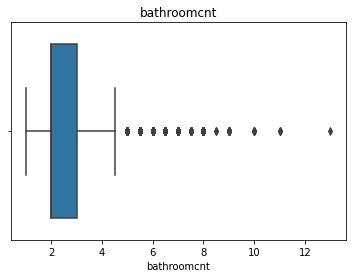

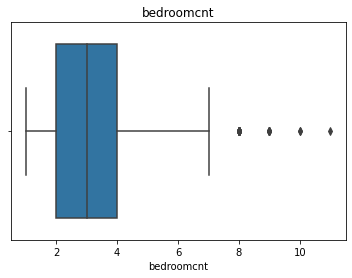

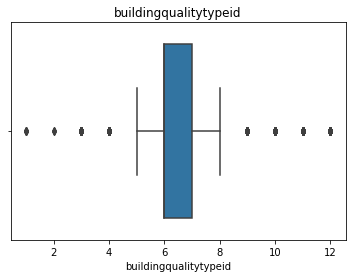

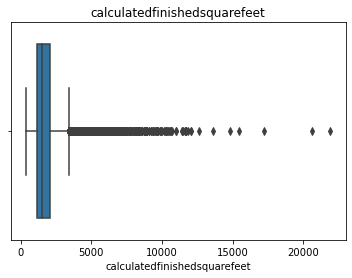

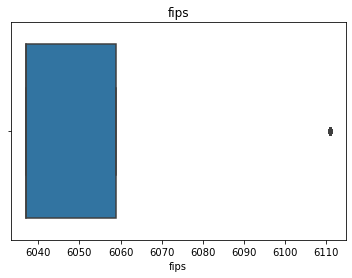

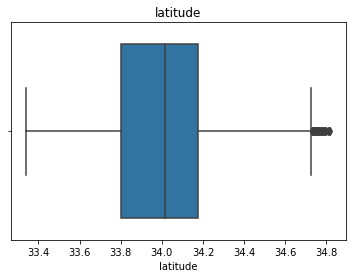

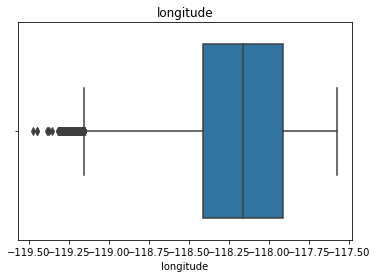

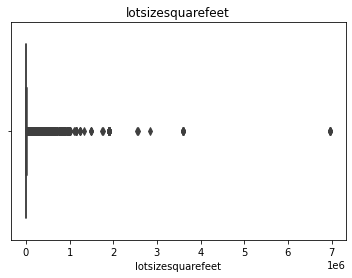

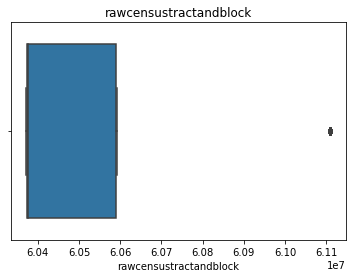

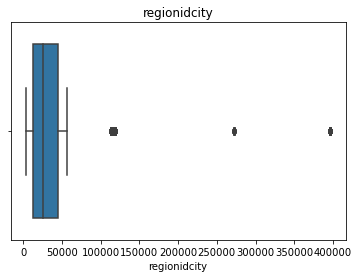

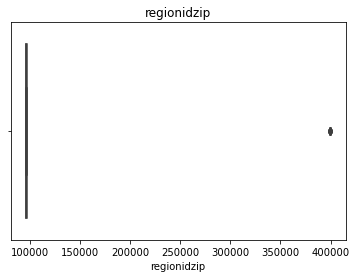

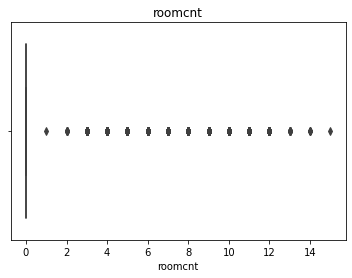

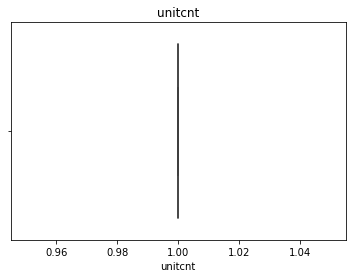

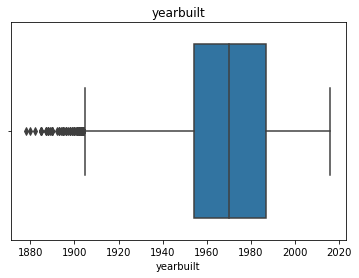

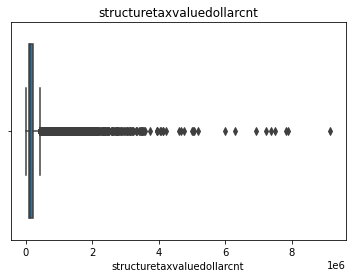

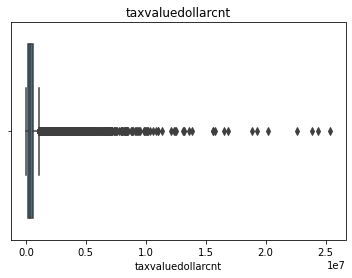

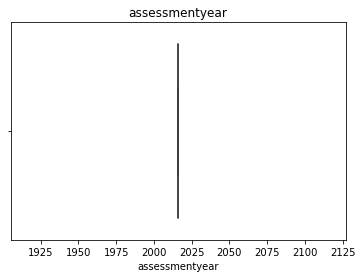

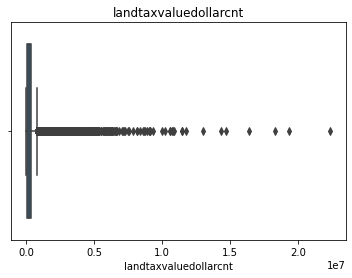

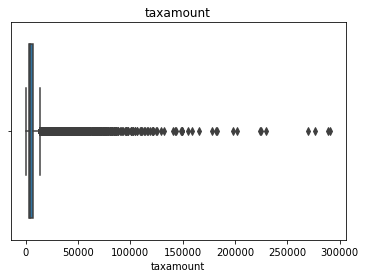

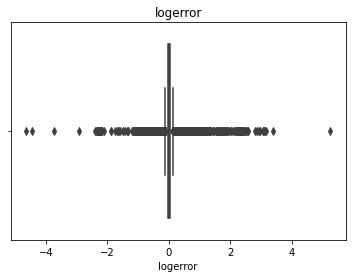

TypeError: Horizontal orientation requires numeric `x` variable.

In [13]:
#Explore Dists of Features:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

### Takeaways:
- Should I deal with outliers in Bathroom count? This was a strong feature/ reliable in regression project without removing outliers of bathroom count directly.
- Outliers in bedroom count as well...Make a feature bedrooms/bathrooms?
- Building Quality type id looks centered / normally distributed
- Outliers in finished square feet 
- Outlier in FIPS? Is that Ventura County? 
- Lat and Long look okay...no action for now
- Lotsize square feet has outliers on upperbound
- Rawcensustractandblock...still need to determine what this is
- Regionid City...Most properties in LA?
- Regionzip...still want to deal with this...suspect errors in data
- roomcnt...most are 0? It is total number of rooms in principal of residence...Should just drop
- Unit count is as expected...drop since all values are equal
- Year built has some outliers...should create new feature for age of home? 
- Structuretaxvaluedollar cnt has outliers in upperbound 
- Assessment year is the same for all properties. Drop column
- Landtax value dollar cnt has has upperbound outliers...Do these outliers correspond with sturcture tax value dollar count?
- Logerror has outliers..How do I want to handle this? Leave as is for the first iteration. 

In [14]:
def outlier_label(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 'Yes'
    else:
        
        return 'No'

In [15]:
columns_to_check = ['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'rawcensustractandblock','yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror']

In [16]:
for col in columns_to_check:
    quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
    iqr = quartile_03 - quartile_01
    
    lower_bound = quartile_01 -(3 * iqr)
    upper_bound = quartile_03 +(3 * iqr)
    
    df['outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

The lower and upper bound of the range for 'bathroomcnt' respectively is: -1.0 and 6.0
The lower and upper bound of the range for 'bedroomcnt' respectively is: -4.0 and 10.0
The lower and upper bound of the range for 'calculatedfinishedsquarefeet' respectively is: -1499.0 and 4717.0
The lower and upper bound of the range for 'lotsizesquarefeet' respectively is: -8253.75 and 25005.0
The lower and upper bound of the range for 'rawcensustractandblock' respectively is: 59720883.48822147 and 61242754.68705377
The lower and upper bound of the range for 'yearbuilt' respectively is: 1855.0 and 2086.0
The lower and upper bound of the range for 'structuretaxvaluedollarcnt' respectively is: -310176.0 and 607254.5
The lower and upper bound of the range for 'taxvaluedollarcnt' respectively is: -882855.0 and 1650891.25
The lower and upper bound of the range for 'landtaxvaluedollarcnt' respectively is: -774145.75 and 1224641.25
The lower and upper bound of the range for 'taxamount' respectively is: -

In [ ]:
outliers = df['outlier'] == 'Yes' # filter for outliers
df[outliers][['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'rawcensustractandblock','yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror']].sort_values(by=['logerror'], ascending=False).head()

In [17]:
outliers = df['outlier'] == 'Yes' # filter for outliers
df[outliers][['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'rawcensustractandblock','yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror']].groupby('parcelid').head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror
parcelid,,,,,,,,,,,
10712007,2.0,3.0,1639.0,9001.0,6.037113e+07,1973.0,67912.0,90667.0,22755.0,1325.62,0.465167
10715366,2.0,3.0,1608.0,8521.0,6.037134e+07,1957.0,66054.0,306868.0,240814.0,3903.21,0.587966
10715616,2.0,4.0,1362.0,7501.0,6.037134e+07,1957.0,75947.0,253165.0,177218.0,3085.01,0.512288
10716243,3.0,5.0,2284.0,7767.0,6.037134e+07,1965.0,185789.0,300585.0,114796.0,3847.19,0.248780
10717817,5.0,5.0,5203.0,13577.0,6.037134e+07,1992.0,713540.0,929660.0,216120.0,11554.01,0.615771
...,...,...,...,...,...,...,...,...,...,...,...
17299418,1.0,1.0,780.0,7313.0,6.111007e+07,1990.0,97402.0,194804.0,97402.0,3066.90,0.247501
17299642,1.0,1.0,780.0,7313.0,6.111007e+07,1990.0,91356.0,152256.0,60900.0,2301.18,-0.344953
17300198,4.5,5.0,3880.0,46609.0,6.111008e+07,1981.0,450000.0,1383000.0,933000.0,15787.14,0.259630


In [21]:
df.outlier.shape[0]/df.shape[0]

1.0

In [20]:
df.shape

(69920, 28)

In [22]:
69920/3752

18.63539445628998

**If I just remove all outliers in the features listed above in columns_to_check, I would lose 18.63 % of the data.**

#### Explore the distributions

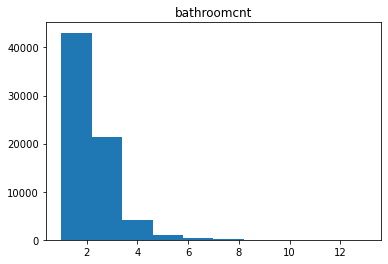

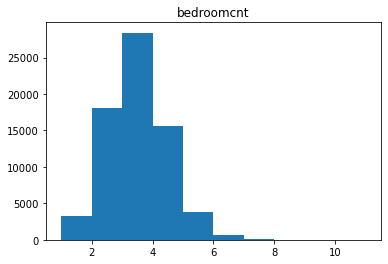

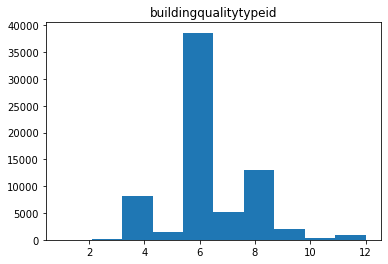

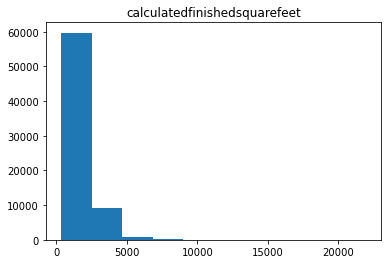

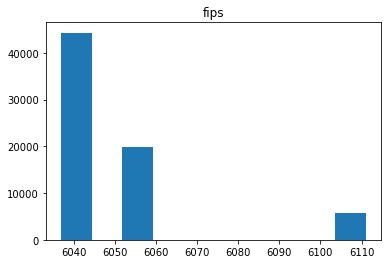

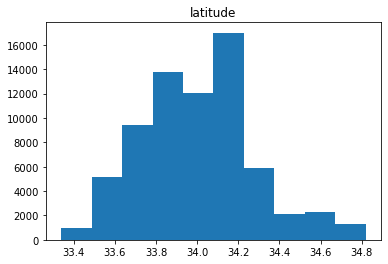

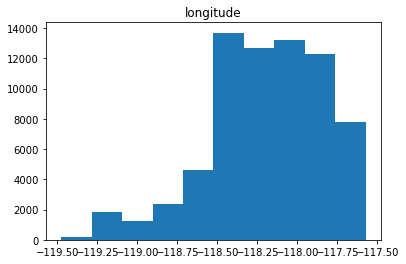

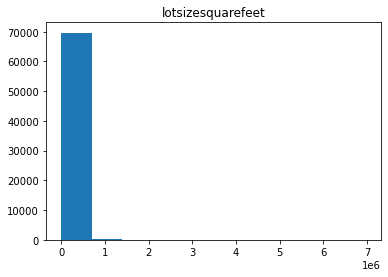

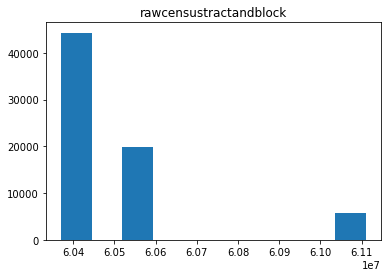

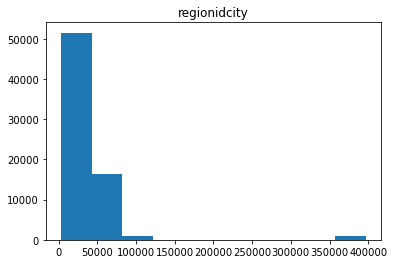

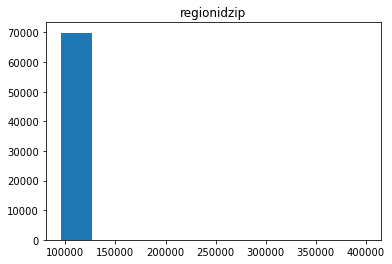

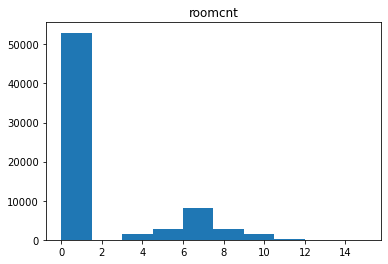

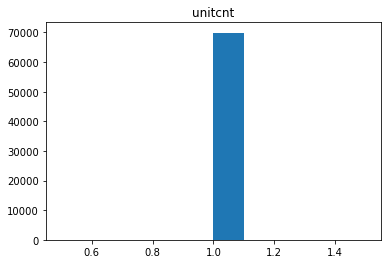

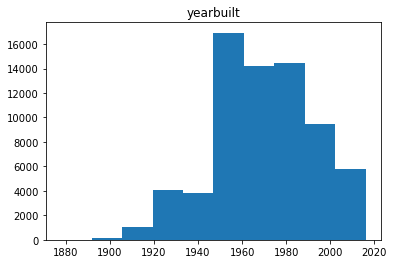

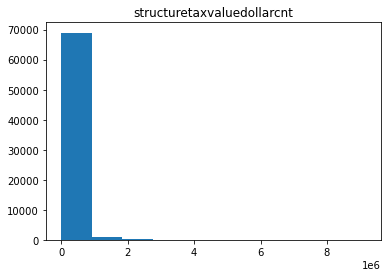

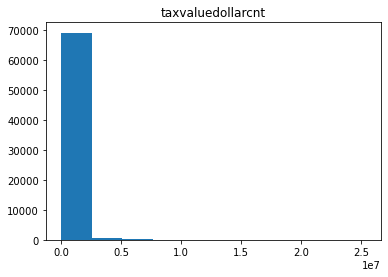

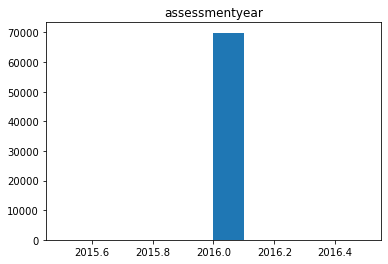

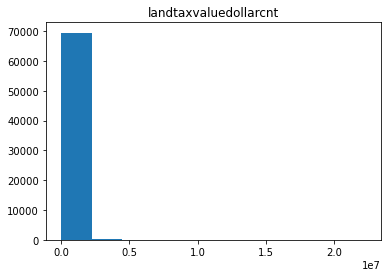

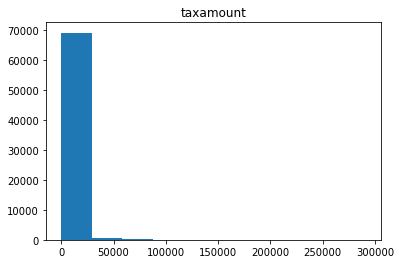

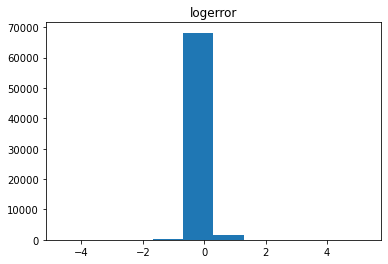

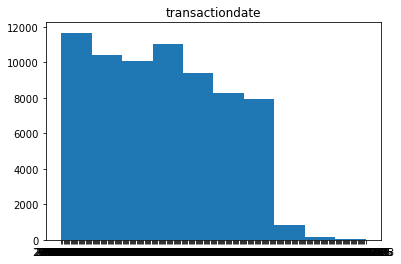

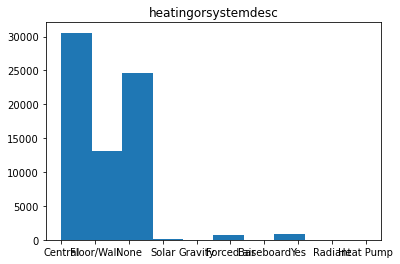

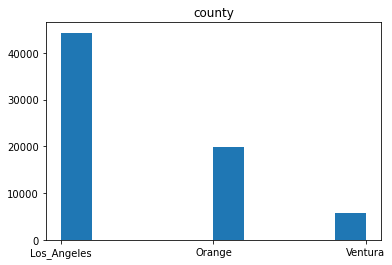

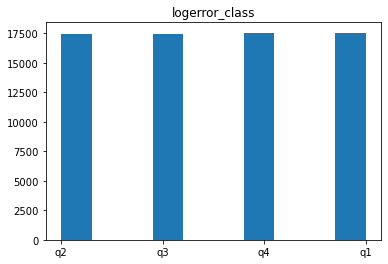

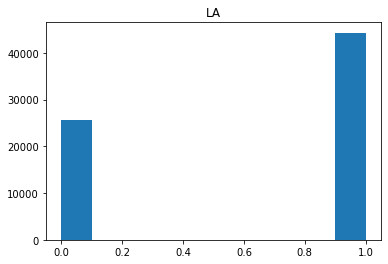

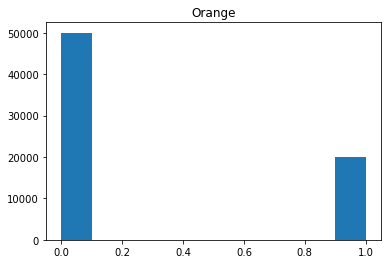

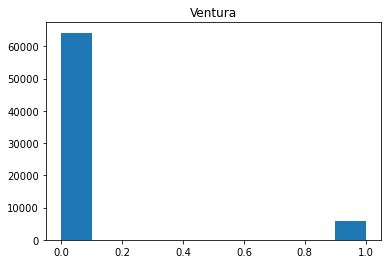

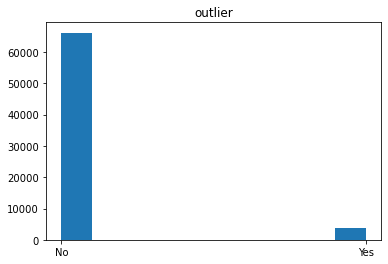

In [24]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

**Takeaways:**
- Need to deal with outliers in 
    - calculatedfinishedsquarefeet
    - lotsizesquarefeet
    - taxdollarvaluecnt
- roomcnt has errors - need to drop


In [25]:
df.drop(columns={'roomcnt', 'unitcnt', 'assessmentyear', 'outlier'}, inplace=True)

In [28]:
def remove_outliers():
    '''
    remove outliers in bed, bath, square feet
    '''

    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 11) & 
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.calculatedfinishedsquarefeet < 4717) 
               )]

In [29]:
df = remove_outliers()

# Now that the most extreme outliers have been removed, let's look at the summary statistics of each numeric field. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,68964.0,2.218302e+00,0.846917,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
bedroomcnt,68964.0,2.986732e+00,0.974010,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
buildingqualitytypeid,68964.0,6.340032e+00,1.341656,1.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,1.200000e+01
calculatedfinishedsquarefeet,68964.0,1.685925e+03,747.495293,3.600000e+02,1.160000e+03,1.498000e+03,2.024000e+03,4.716000e+03
fips,68964.0,6.049264e+03,20.797631,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,68964.0,3.400310e+01,0.268026,3.333953e+01,3.380475e+01,3.401232e+01,3.417479e+01,3.481877e+01
longitude,68964.0,-1.181936e+02,0.360165,-1.194753e+02,-1.184081e+02,-1.181629e+02,-1.179155e+02,-1.175723e+02
lotsizesquarefeet,68964.0,2.751558e+04,119180.556485,2.360000e+02,6.000000e+03,7.313000e+03,1.040225e+04,6.971010e+06
rawcensustractandblock,68964.0,6.049563e+07,206420.027963,6.037101e+07,6.037312e+07,6.037621e+07,6.059052e+07,6.111009e+07
regionidcity,68964.0,3.353546e+04,46742.979641,3.491000e+03,1.244700e+04,2.521800e+04,4.545700e+04,3.965560e+05


In [30]:
df.shape

(68964, 24)

In [31]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'logerror',
       'transactiondate', 'heatingorsystemdesc', 'county', 'logerror_class',
       'LA', 'Orange', 'Ventura'],
      dtype='object')

### Now I am going to break up the dataframe into three separate dfs by county

In [35]:
#Create LA County Dataframe
df_la = df[df.LA == 1].drop(columns = ['county', 'fips', 'LA', 'Ventura', 'Orange']) 
df_la.shape

(43783, 19)

In [36]:
#Create Ventura County Dataframe
df_vent = df[df.Ventura == 1].drop(columns = ['county', 'fips', 'LA', 'Ventura', 'Orange']) 
df_vent.shape

(5612, 19)

In [37]:
#Create Orange County Dataframe
df_orange = df[df.Orange == 1].drop(columns = ['county', 'fips', 'LA', 'Ventura', 'Orange']) 
df_orange.shape

(19569, 19)

#### Starting with Analysis for LA County Props

In [41]:
def split(df, target_var):
    '''
    This function takes in the dataframe and target variable name as arguments and then
    splits the dataframe into train (56%), validate (24%), & test (20%)
    It will return a list containing the following dataframes: train (for exploration), 
    X_train, X_validate, X_test, y_train, y_validate, y_test
    '''
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]

    partitions = [train, X_train, X_validate, X_test, y_train, y_validate, y_test]
    return partitions

In [42]:
partitions = split(df_la, target_var='logerror')

In [43]:
train = partitions[0]
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])
partitions[0] = train

In [44]:
train.logerror_bins.value_counts()

(-0.05, 0.05]    15498
(0.05, 0.2]       3943
(-0.2, -0.05]     3380
(0.2, 4.0]        1104
(-5.0, -0.2]       593
Name: logerror_bins, dtype: int64

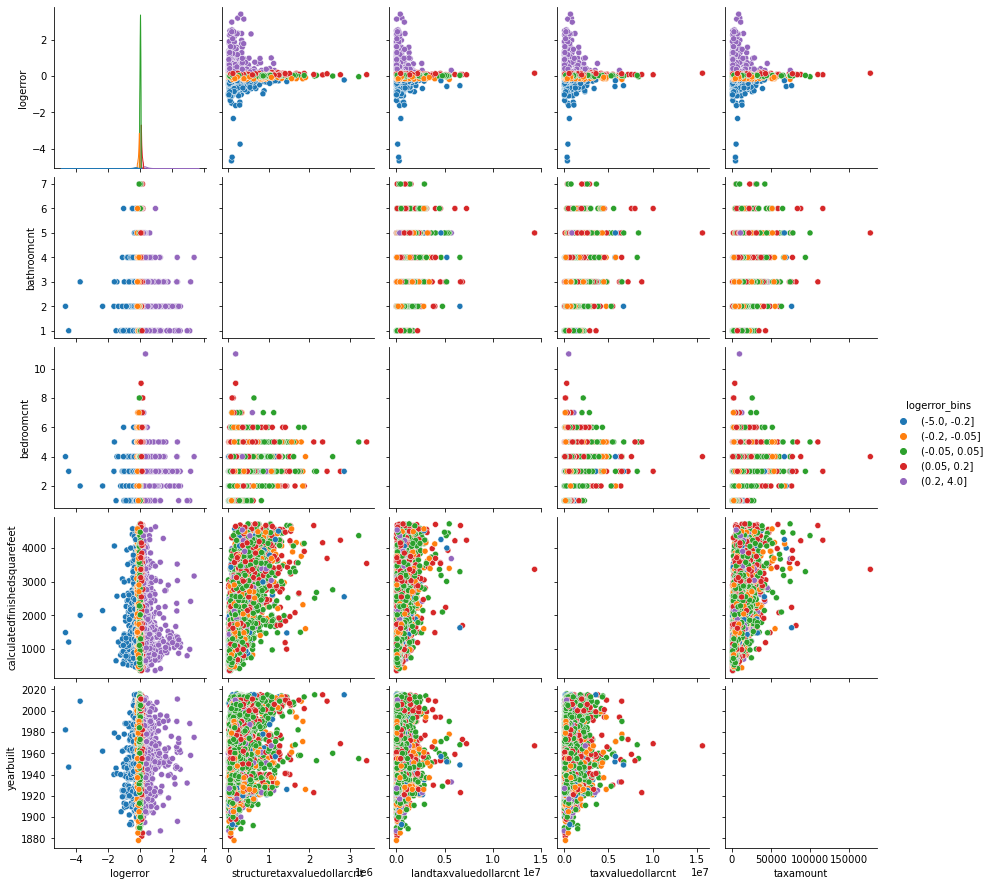

In [46]:
sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 'structuretaxvaluedollarcnt','landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount'],
             y_vars = ['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt'])

#### Scale Continuous Features

In [45]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'logerror',
       'transactiondate', 'heatingorsystemdesc', 'logerror_class',
       'logerror_bins'],
      dtype='object')

In [47]:
#Add this column to the above drop columns list
train.drop(columns={'transactiondate'},inplace=True)

In [48]:
train.drop(columns={'logerror_class'}, inplace=True)

In [49]:
# the variables that still need scaling
scaled_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [50]:
# recall: X[0] is X_train, X[1] is X_validate and X[2] is X_test
X[0].describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidzip,...,scaled_longitude,scaled_lotsizesquarefeet,scaled_rawcensustractandblock,scaled_regionidcity,scaled_regionidzip,scaled_yearbuilt,scaled_structuretaxvaluedollarcnt,scaled_taxvaluedollarcnt,scaled_landtaxvaluedollarcnt,scaled_taxamount
count,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000,2.451800e+04,2.451800e+04,24518.000000,24518.000000,...,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000,24518.000000
mean,2.149278,2.906395,6.544661,1613.434660,34.104269,-118.258187,3.888304e+04,6.037441e+07,35261.367771,96443.398972,...,0.513134,0.005453,0.387133,0.080827,0.001519,0.617747,0.049260,0.027120,0.018397,0.030049
std,0.885721,0.957560,1.652483,713.701536,0.219774,0.213895,1.400122e+05,2.493867e+03,57875.991930,5488.555868,...,0.172333,0.020087,0.283744,0.147243,0.018073,0.171773,0.047389,0.030988,0.025453,0.031892
min,1.000000,1.000000,1.000000,360.000000,33.339600,-118.895075,8.760000e+02,6.037101e+07,3491.000000,95982.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,6.000000,1124.000000,33.955973,-118.418839,6.057000e+03,6.037217e+07,12447.000000,96122.000000,...,0.383698,0.000743,0.131857,0.022785,0.000461,0.514493,0.023724,0.010679,0.004116,0.013355
50%,2.000000,3.000000,6.000000,1438.000000,34.085989,-118.275524,7.522500e+03,6.037409e+07,14542.000000,96282.000000,...,0.499165,0.000954,0.349969,0.028115,0.000988,0.594203,0.037722,0.019638,0.011756,0.022573
75%,3.000000,3.000000,8.000000,1907.000000,34.189931,-118.116000,1.661675e+04,6.037577e+07,45602.000000,96433.000000,...,0.627692,0.002258,0.541110,0.107135,0.001485,0.746377,0.059035,0.032387,0.023220,0.035335
max,7.000000,11.000000,12.000000,4716.000000,34.818767,-117.653901,6.971010e+06,6.037980e+07,396556.000000,399675.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# list of variables I will cluster on. 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'scaled_yearbuilt']
cluster_name = 'area_cluster'
k_range = range(2,20)

In [52]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

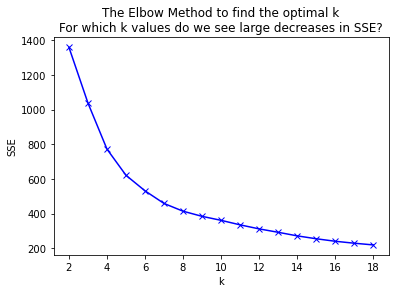

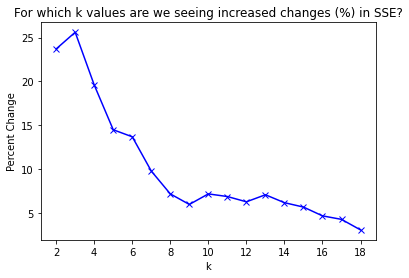

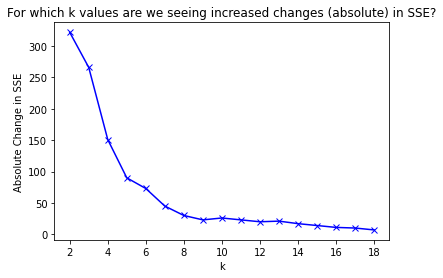

,k,sse,delta,pct_delta
0,2,1359.670308,322.0,23.7
1,3,1037.915724,266.0,25.6
2,4,771.734919,151.0,19.6
3,5,620.561227,90.0,14.5
4,6,530.842905,73.0,13.7
5,7,457.934767,45.0,9.8
6,8,413.228612,30.0,7.2
7,9,383.574928,23.0,6.0
8,10,360.505790,26.0,7.2
9,11,334.408568,23.0,6.9


In [53]:
find_k(X[0], cluster_vars, k_range)